In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def LoadTrack (directory) :
    File = open(directory,'r')
    lines = File.readlines()
    
    length = int(lines[0])
    
    gantry_angle = []
    table_angle = []
    for l in lines[1:] :
        word = l.split('\t')
        #print(word)
        gantry_angle.append(float(word[0]))
        table_angle.append(float(word[1]))
    
    return np.array(gantry_angle), np.array(table_angle)

In [3]:
track_path = '/home/janik/Praktikum_medPhys/dto/patients/Camus/plans/p1/gtc/'+'t1-gtc.txt'

ga, ta = LoadTrack(directory=track_path)

In [5]:
"""def GetIsocenter (directory) :
    File = open(directory,'r')
    lines = File.readlines()
    
    tup = lines[0].split(' ')
    lis = [float(t) for t in tup]
    return np.array(lis)"""

"def GetIsocenter (directory) :\n    File = open(directory,'r')\n    lines = File.readlines()\n    \n    tup = lines[0].split(' ')\n    lis = [float(t) for t in tup]\n    return np.array(lis)"

In [6]:
#isocenter_path = '/home/janik/Praktikum_medPhys/dto/patients/Camus/setups/all_OaR/isocenter.txt'
#iso = GetIsocenter(directory=isocenter_path)
iso = np.array([0.,0.,0.])
print('isocenter hfs: ',iso)


isocenter hfs:  [ 0.  0.  0.]


In [7]:
"""def GetRadialVector (gantry_angle, table_angle) :
    
    phi = gantry_angle + 180. # [0,360]
    theta = table_angle + 90. # [0,180]
    
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    return np.array([x,y,z])"""

'def GetRadialVector (gantry_angle, table_angle) :\n    \n    phi = gantry_angle + 180. # [0,360]\n    theta = table_angle + 90. # [0,180]\n    \n    x = np.sin(theta) * np.cos(phi)\n    y = np.sin(theta) * np.sin(phi)\n    z = np.cos(theta)\n    \n    return np.array([x,y,z])'

In [8]:
#r = GetRadialVector(gantry_angle=ga[0],table_angle=ta[0])
SAD = 100.
#BEV = iso + SAD * r
BEV = np.array([0.,0.,SAD])
#print(r)
print('beam eye view',BEV)

beam eye view [   0.    0.  100.]


In [9]:
def GetPTV_vertices (directory) :
    File = open(directory,'r')
    lines = File.readlines()
    
    N_vertices = int(lines[0])
    vertices = []
    for l in lines[1:N_vertices] :
        word = l.split(' ')
        v = np.array([float(word[0]),float(word[1]),float(word[2])])
        vertices.append(v)
    return np.array(vertices)

In [10]:
PTV_path = '/home/janik/Praktikum_medPhys/dto/patients/Camus/setups/all_OaR/PTV_I.1.1_hfs.txt'
#PTV_path = '/home/janik/Praktikum_medPhys/dto/patients/Camus/mesh/PTV_I.1.1.txt'

PTV_vertices = GetPTV_vertices(directory=PTV_path)
print(PTV_vertices[0])
print(np.shape(PTV_vertices))


[-0.782627 -4.24086   2.46885 ]
(2360, 3)


In [11]:
def PlotCload(point_matrix) :
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111,projection='3d')

    x = point_matrix[:,0]
    y = point_matrix[:,1]
    z = point_matrix[:,2]
    
    ax.scatter(x,y,z,'bo')
    ax.scatter(0.,0.,0.,'bo')

    plt.show()

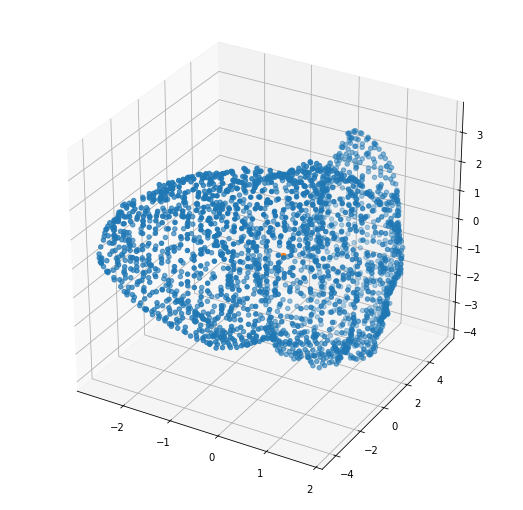

In [12]:
PlotCload(point_matrix=PTV_vertices)

In [13]:
gantry = np.deg2rad( 0.)#ga[0]
table = np.deg2rad(0.)#ta[0]

print(gantry,table)

0.0 0.0


In [14]:
Rz = np.array([[np.cos(-table), -np.sin(-table), 0.],
               [np.sin(-table),np.cos(-table),0.],
               [0.,0.,1.]])

Ry = np.array([[np.cos(-gantry), 0 , -np.sin(-gantry)],
             [0.,1.,0.],
             [np.sin(-gantry),0.,np.cos(-gantry)]])


In [15]:
def dot(a,b) :
    return np.linalg.multi_dot((a,b))

In [16]:
PTV_vertices_trafo = np.array([dot(dot(Rz,v),Ry) for v in PTV_vertices])

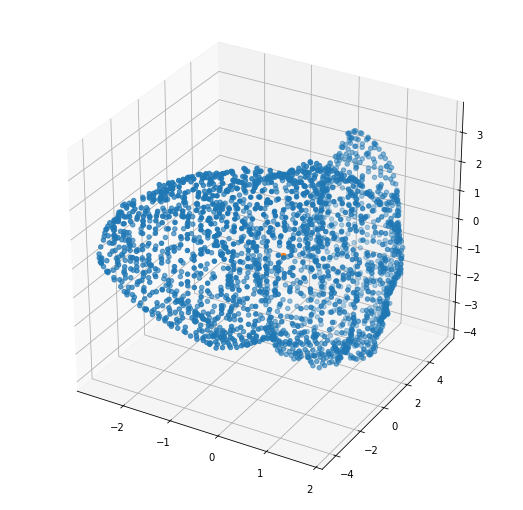

In [17]:
PlotCload(point_matrix=PTV_vertices_trafo)

$$
v_{proj} = v - ((v-iso=0) \cdot r=e_z) \cdot r=e_z )
$$

In [18]:
def projection (vector, BEV) :
    z_BEV = BEV[2]
    z_p = vector[2]
    
    lam = z_p / (z_BEV - z_p)
    
    
    return vector + lam * (vector - BEV)

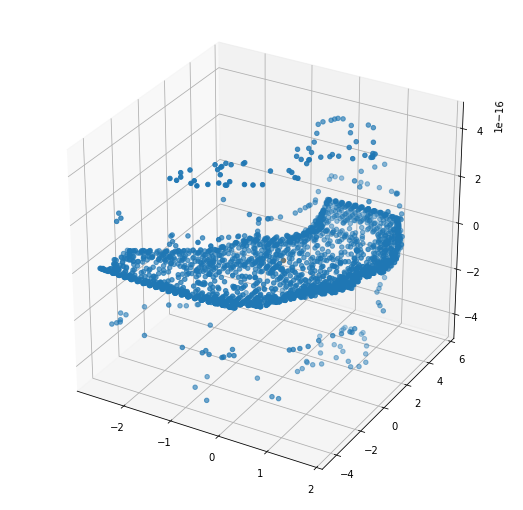

In [19]:
PTV_vertices_trafo_proj = np.array([projection(vector=v,BEV=BEV) for v in PTV_vertices_trafo])
PlotCload(point_matrix=PTV_vertices_trafo_proj)

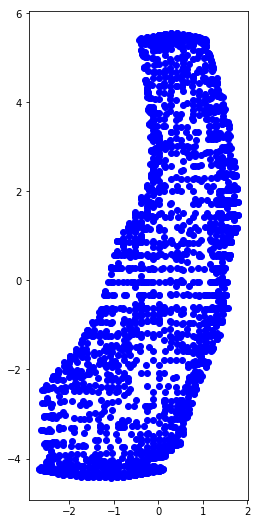

In [20]:
fig = plt.figure(figsize=(7,9))
ax = fig.add_subplot(111)
a = [i[0] for i in PTV_vertices_trafo_proj]
b = [i[1] for i in PTV_vertices_trafo_proj]

ax.set_aspect(aspect='equal')
plt.plot(a,b,'bo')
plt.show()

In [21]:
from scipy.spatial import ConvexHull
points = (PTV_vertices_trafo_proj[:,[0,1]])   # 30 random points in 2-D
hull = ConvexHull(points)

In [22]:
#print(hull.simplices)
print((hull.simplices[:,0]))

Q = PTV_vertices_trafo_proj[np.hstack((hull.simplices[:,0],hull.simplices[:,1]))]
print(Q.shape)
print(Q[1])

[ 655  655 2262 1133  424  424 2226 2226 1985 1985   43   47 1530 1530 1643
 1643 1751 2238 2238 2252 2252 2271 2271 2248 2248   42   42   44  217   27
   27    2    2 1904 1904  216  216  207  207   45   45  213  215  215]
(88, 3)
[-2.61639566 -2.45020635  0.        ]


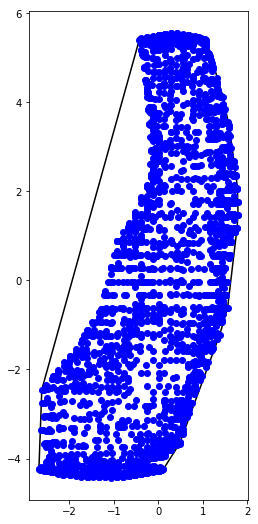

In [23]:
fig = plt.figure(figsize=(7,9))
ax = fig.add_subplot(111)
a = [i[0] for i in PTV_vertices_trafo_proj]
b = [i[1] for i in PTV_vertices_trafo_proj]
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
ax.set_aspect(aspect='equal')
plt.plot(a,b,'bo')
plt.show()

In [24]:
x_BEV = PTV_vertices_trafo_proj[:,0]
y_BEV = PTV_vertices_trafo_proj[:,1]

colli_angle = np.deg2rad(np.arange(-175.,176,2.)) # [-179,179] in steps of 2
#length = len(colli_angle)

colli_matrix = np.array([np.cos(colli_angle),np.sin(colli_angle)])

print(np.shape(colli_matrix))
print(np.shape(PTV_vertices_trafo_proj[:,:-1]))

(2, 176)
(2360, 2)


In [25]:
A = np.dot(PTV_vertices_trafo_proj[:,:-1],colli_matrix)

x_min_dist = np.max(A,axis=0) - np.min(A,axis=0)

# LOOP


In [26]:
import time

In [27]:
length = len(ga)

col_map = []
start = time.time()

for i in range(length) :
    gantry = np.deg2rad( ga[i])#ga[0]
    table = np.deg2rad(ta[i])#ta[0]
    
    Rz = np.array([[np.cos(-table), -np.sin(-table), 0.],
               [np.sin(-table),np.cos(-table),0.],
               [0.,0.,1.]])

    Ry = np.array([[np.cos(-gantry), 0 , -np.sin(-gantry)],
             [0.,1.,0.],
             [np.sin(-gantry),0.,np.cos(-gantry)]])

    PTV_vertices_trafo = np.array([dot(dot(Rz,v),Ry) for v in PTV_vertices])
    PTV_vertices_trafo_proj = np.array([projection(vector=v,BEV=BEV) for v in PTV_vertices_trafo])
    
    
    
    colli_angle = np.deg2rad(np.arange(-175.,176,2.)) # [-179,179] in steps of 2
    colli_matrix = np.array([np.cos(colli_angle),np.sin(colli_angle)])
    
    A = np.dot(PTV_vertices_trafo_proj[:,:-1],colli_matrix)
    x_min_dist = np.max(A,axis=0) - np.min(A,axis=0)
    
    col_map.append(x_min_dist)

print('time: ',time.time()-start)    

time:  14.379019498825073


In [28]:
BEV = np.zeros(len(PTV_vertices[:,0])) + SAD
print(type(BEV))
print (BEV)

<class 'numpy.ndarray'>
[ 100.  100.  100. ...,  100.  100.  100.]


In [108]:
start = time.time()

length = len(ga)
print(ga)
col_map = []

colli_angle = np.deg2rad(np.arange(-179.,0.,2.)) # [-179,179] in steps of 2
##
#ONLY NEED TO DO HALF BECAUSE THEN PATTERN GETS REPEATED
##
#print(len(colli_angle))

colli_matrix = np.array([np.cos(colli_angle),-np.sin(colli_angle)])

BEV = np.zeros(np.shape(PTV_vertices)) 
BEV[:,2] += SAD
print(length)    
for i in range(length) :
    gantry = np.deg2rad( ga[i])#ga[0]
    table = np.deg2rad(ta[i])#ta[0]
    
    Rz_red = np.array([[np.cos(-table), -np.sin(-table)],
               [np.sin(-table),np.cos(-table)]])

    Ry_red = np.array([[np.cos(-gantry), -np.sin(-gantry)],
                         [np.sin(-gantry),np.cos(-gantry)]])

    M1 = np.dot(Rz_red,PTV_vertices[:,[0,1]].T) 
    
    
    y_trafo = M1[1,:]
    
    
    M2 = np.dot(Ry_red,np.vstack((M1[0,:],PTV_vertices[:,2])) )
    x_trafo = M2[0,:]
    z_trafo = M2[1,:]
    
    PTV_vertices_trafo = np.vstack((x_trafo,y_trafo,z_trafo)).T
    
    #PTV_vertices_trafo_proj = np.array([projection(vector=v,BEV=BEV) for v in PTV_vertices_trafo])
    z_points = PTV_vertices_trafo[:,2]
    #print(np.shape(z_points))
    #print(BEV)
    lambda_vec = np.divide(z_points,BEV[:,2]-z_points)
    PTV_vertices_trafo_proj = PTV_vertices_trafo + np.multiply((PTV_vertices_trafo-BEV).T,lambda_vec).T
    #PTV_vertices_trafo_proj = PTV_vertices_trafo
    
    
    points = (PTV_vertices_trafo_proj[:,[0,1]])  
    hull = ConvexHull(points)
    Q = PTV_vertices_trafo_proj[np.hstack((hull.simplices[:,0],hull.simplices[:,1]))]
    
    """
    old A
    """
    #A = np.dot(PTV_vertices_trafo_proj[:,[0,1]],colli_matrix)
    A = np.dot(Q[:,[0,1]],colli_matrix)
       
    x_min_dist = np.max(A,axis=0) - A.min(axis=0)
    
    col_map.append(x_min_dist)
    
dist_map = np.hstack((col_map,col_map)).T
dist_map = dist_map / dist_map.max()
print('time: ',time.time()-start)
print(dist_map.shape)

[-179.      -177.983   -175.949   -173.915   -171.881   -169.847   -167.812
 -165.778   -163.744   -161.71    -159.676   -157.642   -155.608   -153.574
 -151.54    -149.506   -147.472   -145.438   -143.403   -141.369   -139.335
 -137.301   -135.267   -133.233   -131.199   -129.165   -127.131   -125.097
 -123.062   -121.028   -118.994   -116.96    -114.926   -112.892   -110.858
 -108.824   -106.79    -104.756   -102.722   -100.688    -98.6534   -96.6193
  -94.5852   -92.5511   -90.517    -88.483    -86.4489   -84.4148   -82.3807
  -80.3466   -78.3125   -76.2784   -74.2443   -72.2102   -70.1761   -68.142
  -66.108    -64.0739   -62.0398   -60.0057   -57.9716   -55.9375   -53.9034
  -51.8693   -49.8352   -47.8011   -45.767    -43.733    -41.6989   -39.6648
  -37.6307   -35.5966   -33.5625   -31.5284   -29.4943   -27.4602   -25.4261
  -23.392    -21.358    -19.3239   -17.2898   -15.2557   -13.2216   -11.1875
   -9.15341   -7.11932   -5.08523   -3.05114   -1.01705    1.01705
    3.05114    

In [109]:
def QuickPlot2 (pic,name=None) :
    plt.figure(figsize=(11,11))
    plt.imshow(pic,origin='left',cmap='jet',extent=[-180,180,-180,180])
    ##plt.gca().set_xticks(np.arange(-180,180,2))
    #plt.gca().set_yticks(np.arange(-175,175,2))
    plt.xlabel('gantry angle')
    plt.ylabel('collimator angle angle')
    plt.colorbar(orientation='horizontal')
    if name != None :
        plt.savefig(name)

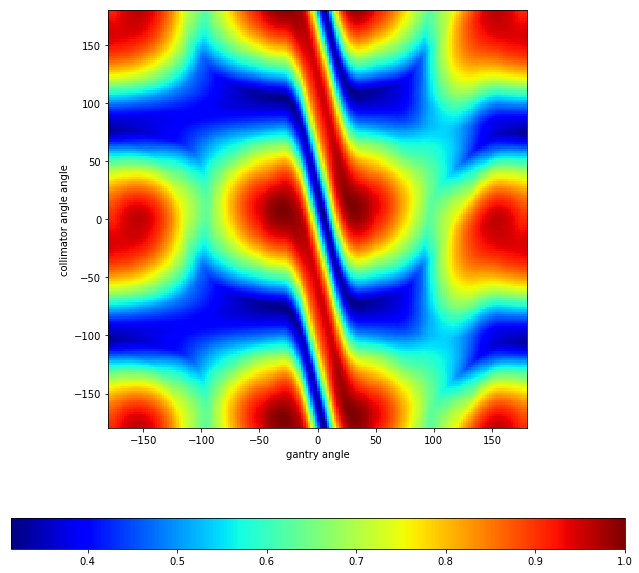

In [111]:
QuickPlot2(pic=dist_map,name='min_dist_plot')
plt.show()

In [112]:
start = time.time()

length = len(ga)
col_map = []

colli_angle = np.deg2rad(np.arange(-179.,-90.,2.)) # [-179,179] in steps of 2
print(len(colli_angle))
##
#ONLY NEED TO DO 1/4 BECAUSE THEN PATTERN GETS REPEATED
##
#print(len(colli_angle))

#print(len(colli_angle))

colli_matrix = np.array([np.cos(colli_angle),-np.sin(colli_angle)])
colli_matrix2 = np.array([np.sin(colli_angle),np.cos(colli_angle)])

BEV = np.zeros(np.shape(PTV_vertices)) 
BEV[:,2] += SAD
    
for i in range(length) :
    gantry = np.deg2rad( ga[i])#ga[0]
    table = np.deg2rad(ta[i])#ta[0]
    
    Rz_red = np.array([[np.cos(-table), -np.sin(-table)],
               [np.sin(-table),np.cos(-table)]])

    Ry_red = np.array([[np.cos(-gantry), -np.sin(-gantry)],
                         [np.sin(-gantry),np.cos(-gantry)]])

    M1 = np.dot(Rz_red,PTV_vertices[:,[0,1]].T) 
    
    
    y_trafo = M1[1,:]
    
    
    M2 = np.dot(Ry_red,np.vstack((M1[0,:],PTV_vertices[:,2])) )
    x_trafo = M2[0,:]
    z_trafo = M2[1,:]
    
    PTV_vertices_trafo = np.vstack((x_trafo,y_trafo,z_trafo)).T
    
    #PTV_vertices_trafo_proj = np.array([projection(vector=v,BEV=BEV) for v in PTV_vertices_trafo])
    z_points = PTV_vertices_trafo[:,2]
    #print(np.shape(z_points))
    #print(BEV)
    lambda_vec = np.divide(z_points,BEV[:,2]-z_points)
    PTV_vertices_trafo_proj = PTV_vertices_trafo + np.multiply((PTV_vertices_trafo-BEV).T,lambda_vec).T
    #PTV_vertices_trafo_proj = PTV_vertices_trafo
    
    
    points = (PTV_vertices_trafo_proj[:,[0,1]])  
    hull = ConvexHull(points)
    Q = PTV_vertices_trafo_proj[np.hstack((hull.simplices[:,0],hull.simplices[:,1]))]
    
    """
    old A
    """
    #A = np.dot(PTV_vertices_trafo_proj[:,[0,1]],colli_matrix)
    A = np.dot(Q[:,[0,1]],colli_matrix)
    
    B = np.dot(Q[:,[0,1]],colli_matrix2)
       
    x_min_dist = A.max(axis=0) - A.min(axis=0)
    y_min_dist = B.max(axis=0) - B.min(axis=0)
    
    col_map.append(np.multiply(x_min_dist,y_min_dist))
    
area_map = np.hstack((col_map,col_map,col_map,col_map)).T
area_map /= area_map.max()
print('time: ',time.time()-start) 

45
time:  0.5594894886016846


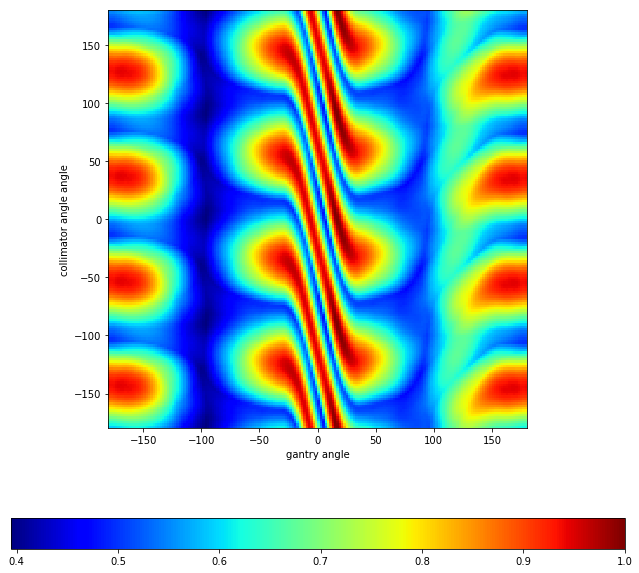

In [113]:
QuickPlot2(pic=area_map,name='area_plot')
plt.show()

# Astar search

In [91]:
import numpy as np
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self):
        return len(self.elements) == 0
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]
    
class GC_map :
    def __init__(self, color_map, gradient=1,start=0,end=180,seeTheFuture=3) :
        self.color = color_map
        self.grad = gradient
        self.start_ga_Pixel = start
        self.end_ga_Pixel = end
        self.future = seeTheFuture
        
        self.colliMaxPixel, self.gantryMaxPixel = np.shape(self.color)
        
        
    def GetNeighbours (self, point) :
        """
        params:
            point      - is of type tuple. represents the coordinates (x,y) in pixel
                         units, i.e. in terms of the dimension of the color map
        returns :
            neighbours - is a list of tuples. Each list element is a tuple (x,y) of
                         points being the nrighbours of the input point
        """

        x,y = point
        
        neighbours = [(x+1,t) for t in range(self.colliMaxPixel)]
        
        
        #re-map function GetNeighbours at runtime
        self.GetNeighbours = self.GetNeighbours_post
        
        #first time there is no forbidden pixel outside the map
        
        return neighbours

    def GetNeighbours_post (self, point) :
        """
        params:
            point      - is of type tuple. represents the coordinates (x,y) in pixel
                         units, i.e. in terms of the dimension of the color map
        returns :
            neighbours - is a list of tuples. Each list element is a tuple (x,y) of
                         points being the nrighbours of the input point
        """

        x,y = point      
       
        #go to right
        neighbours = [(x+1,y)]
        for g in range(self.grad) :
            neighbours.append((x+1,y+(1+g)))
            neighbours.append((x+1,y-(1+g)))

        
        forbidden = []
        for n in neighbours :
            if (n[1]<0 or n[1]>self.colliMaxPixel-1) :
                forbidden.append(n)
            
        for f in forbidden :
            neighbours.remove(f)

        """    
        neighbours[:] = [n for n in neighbours if (n[0]>=0 and n[0]<=self.gantryMaxPixel-1 and n[1]>=0 and n[1]<=self.tableMaxPixel-1
               and self.collision[n[::-1]] == 0. and self.ct[n[::-1]] == 0.)]
        """
        
        return neighbours
    
    def cost (self, next_point) :
        return self.color[next_point[::-1]]
    
    def heuristic(self,next_point) :
        x,y = next_point
        return np.sum(self.color[y][x:x+self.future])

    
def reconstruct_path(came_from, start, goal):
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    
    #append start point being one to the left 
    #path.append((path[-1][0]-1,path[-1][1])) 
    
    path.reverse() 
    return path

In [92]:
def a_star_search(graph, ga_Pixel_range):
    
    start = (ga_Pixel_range[0],0)
    goal = ga_Pixel_range[1]
    
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    
     
        
    while not frontier.empty():
        current = frontier.get()
        if current[0] == goal:
            break
        
        for next_point in graph.GetNeighbours(current) :
            new_cost = cost_so_far[current] + graph.cost(next_point)
            if next_point not in cost_so_far or new_cost < cost_so_far[next_point]:
                cost_so_far[next_point] = new_cost
                
                priority = new_cost + graph.heuristic(next_point)
                
                frontier.put(next_point, priority)
                came_from[next_point] = current
            
        
    return came_from, current

In [114]:

go = time.time()


ga_start = -1
ga_stop = 177


#pathToOARs = '../../Test-2/plans/plan-1/gt-maps/track-1-map.txt'
#dim, ga, ta, oARmap = ut.load3DColorwash(pathToOARs)


GC = GC_map(color_map=dist_map,gradient=4,start=ga_start,end=ga_stop)
print('map initialize',time.time()-go)
go = time.time()

came_from, last_point = a_star_search(GC, ga_Pixel_range=[ga_start,ga_stop])

#profile.run("a_star_search()")
print('path search',time.time()-go)
go = time.time()

path = reconstruct_path(came_from=came_from, start=(ga_start,0),goal=last_point)

print('reco path',time.time()-go)


map initialize 0.0007345676422119141
path search 3.4140260219573975
reco path 0.0005428791046142578


In [115]:
for p in path :
    print(p[1]*2-180.)

74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
72.0
72.0
72.0
72.0
72.0
74.0
82.0
82.0
82.0
82.0
82.0
84.0
86.0
86.0
86.0
86.0
88.0
88.0
88.0
88.0
88.0
88.0
90.0
90.0
92.0
96.0
96.0
96.0
96.0
98.0
98.0
98.0
98.0
98.0
104.0
104.0
112.0
112.0
110.0
110.0
108.0
108.0
108.0
106.0
106.0
106.0
106.0
104.0
104.0
104.0
104.0
104.0
104.0
104.0
104.0
104.0
104.0
104.0
102.0
102.0
98.0
96.0
92.0
88.0
82.0
76.0
68.0
60.0
52.0
44.0
36.0
28.0
20.0
12.0
4.0
-4.0
-12.0
-20.0
-28.0
-36.0
-44.0
-50.0
-56.0
-60.0
-64.0
-68.0
-70.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-74.0
-72.0
-72.0
-72.0
-72.0
-70.0
-70.0
-70.0
-68.0
-68.0
-66.0
-66.0
-64.0
-64.0
-62.0
-60.0
-58.0
-56.0
-56.0
-56.0
-62.0
-70.0
-78.0
-86.0
-86.0
-92.0
-100.0
-100.0
-102.0
-102.0
-102.0
-104.0
-112.0
-120.0
-128.0
-136.0
-136.0
-134.0
-132.0
-130.0
-128.0
-126.0
-124.0
-122.0
-120.0
-118.0
-118.0
-116.0
-114.0
-112.0
-110.0
-110.0
-110.0
-108.0
-108.0
-108.0
-108.0
-108.0
-108.0
-108.0
-1

In [116]:
import sys
sys.path.insert(0,'/home/janik/Praktikum_medPhys/FirstSearchAlgos/code/')
import util as ut
import plotting as pl

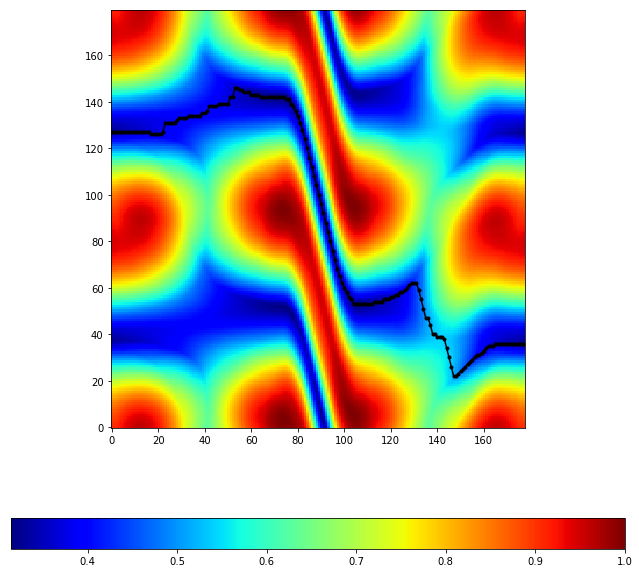

In [118]:
pl.FlooadPlot(pic=dist_map,flood_level=1.)

pl.PlotTrack(path)
plt.savefig('min_dist_A*Grad4')
plt.show()

$$
v_{proj} = v - ((v-iso) \cdot r) \cdot r )
$$

In [35]:
"""print(PTV_vertices[0:5])
print(iso)
print(r)
print('------------')
print((PTV_vertices-iso)[0:5])
print((np.dot(PTV_vertices-iso,r))[0:5])
minus = ([factor*r for factor in np.dot(PTV_vertices-iso,r)])
print(([factor*r for factor in np.dot(PTV_vertices-iso,r)])[0:5])
print('---------')
print(list(np.array(PTV_vertices)-np.array(minus))[0:5])

PTV_vertices_projected = list(np.array(PTV_vertices)-np.array(minus))"""

"print(PTV_vertices[0:5])\nprint(iso)\nprint(r)\nprint('------------')\nprint((PTV_vertices-iso)[0:5])\nprint((np.dot(PTV_vertices-iso,r))[0:5])\nminus = ([factor*r for factor in np.dot(PTV_vertices-iso,r)])\nprint(([factor*r for factor in np.dot(PTV_vertices-iso,r)])[0:5])\nprint('---------')\nprint(list(np.array(PTV_vertices)-np.array(minus))[0:5])\n\nPTV_vertices_projected = list(np.array(PTV_vertices)-np.array(minus))"

In [34]:
"""%matplotlib notebook
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')

a = [i[0] for i in PTV_vertices_projected]
b = [i[1] for i in PTV_vertices_projected]
c = [i[2] for i in PTV_vertices_projected]


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(a,b,c,'bo')
ax.scatter(iso[0],iso[1],iso[2],'ro')
plt.show()"""

"%matplotlib notebook\nfig = plt.figure(figsize=(9,9))\nax = fig.add_subplot(111,projection='3d')\n\na = [i[0] for i in PTV_vertices_projected]\nb = [i[1] for i in PTV_vertices_projected]\nc = [i[2] for i in PTV_vertices_projected]\n\n\nax.set_xlabel('X Label')\nax.set_ylabel('Y Label')\nax.set_zlabel('Z Label')\n\nax.scatter(a,b,c,'bo')\nax.scatter(iso[0],iso[1],iso[2],'ro')\nplt.show()"